In [32]:
import pandas as pd
import os
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
os.chdir('..')
papers = pd.read_csv(r"C:\Users\sitas\OneDrive\Desktop\Python\doc_topics.csv",encoding='cp1252')
papers

,Doc_ID,Topic,Abstract
0,17141,8,Virtually all of the growth in human populatio...
1,29480,10,Community garden research has focused on socia...
2,32823,9,Using the case of an economically declined nei...
3,37501,4,This article examines the motivations of women...
4,48158,13,This paper reviews research on urban agricultu...
...,...,...,...
1448,5038350,8,Urban air quality can be improved through a va...
1449,5038413,11,"In this study, the microbiological food safety..."
1450,5038482,11,The multiple functions of urban soils secure t...
1451,5038485,3,Historic gardens have the ability to provide s...


In [34]:
# Remove punctuation and convert the text into lower case
papers = papers.drop(columns=['Doc_ID', 'Topic'])
papers['paper_text'] = papers['Abstract'].str.replace(r'[^\w\s]+', '')
papers['paper_text'] = papers['paper_text'].apply(lambda x:x.lower())
papers['paper_text']

C:\Users\sitas\AppData\Local\Temp\ipykernel_8328\4021774177.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  papers['paper_text'] = papers['Abstract'].str.replace(r'[^\w\s]+', '')


0       virtually all of the growth in human populatio...
1       community garden research has focused on socia...
2       using the case of an economically declined nei...
3       this article examines the motivations of women...
4       this paper reviews research on urban agricultu...
                              ...                        
1448    urban air quality can be improved through a va...
1449    in this study the microbiological food safety ...
1450    the multiple functions of urban soils secure t...
1451    historic gardens have the ability to provide s...
1452    one focus of those responsible for making urba...
Name: paper_text, Length: 1453, dtype: object

C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength

C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and wi

C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will b

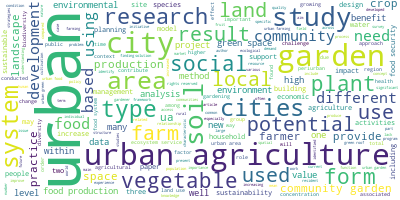

In [35]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [50]:
stop_words = stopwords.words('english')
stop_words.extend(['may', 'well', 'also', 'however', 'use','used','pb'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.paper_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)


In [51]:
print(data_words)

[['virtually', 'growth', 'human', 'population', 'next', 'generation', 'projected', 'cities', 'given', 'environmental', 'stresses', 'planet', 'today', 'critically', 'important', 'new', 'urban', 'areas', 'little', 'negative', 'impacts', 'comprehensive', 'assessment', 'impacts', 'include', 'operational', 'factors', 'energy', 'water', 'food', 'transportation', 'embodied', 'consequences', 'construction', 'maintenance', 'analysis', 'expressed', 'units', 'energy', 'build', 'operate', 'city', 'grow', 'food', 'treat', 'desalinate', 'water', 'travel', 'units', 'area', 'required', 'accommodate', 'housing', 'grow', 'food', 'generate', 'solar', 'energy', 'photovoltaic', 'generation', 'area', 'universally', 'available', 'form', 'renewable', 'energy', 'study', 'models', 'new', 'city', 'inhabitants', 'temperate', 'climate', 'built', 'year', 'comprehensive', 'footprint', 'city', 'established', 'given', 'certain', 'assumptions', 'lifestyle', 'diet', 'technology', 'resulting', 'area', 'required', 'city',

In [52]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
id2word.filter_extremes(no_below=2, no_above=1.0)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View

print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 5), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [57]:
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 13 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"urban" + 0.007*"food" + 0.006*"gardens" + 0.006*"production" + '
  '0.005*"study" + 0.005*"areas" + 0.005*"agriculture" + 0.005*"city" + '
  '0.005*"land" + 0.004*"community"'),
 (1,
  '0.028*"urban" + 0.011*"gardens" + 0.010*"food" + 0.008*"agriculture" + '
  '0.006*"community" + 0.006*"garden" + 0.005*"gardening" + 0.005*"study" + '
  '0.004*"land" + 0.004*"areas"'),
 (2,
  '0.028*"urban" + 0.015*"food" + 0.010*"agriculture" + 0.007*"production" + '
  '0.006*"gardens" + 0.005*"local" + 0.005*"city" + 0.005*"green" + '
  '0.005*"study" + 0.005*"soil"'),
 (3,
  '0.023*"urban" + 0.010*"food" + 0.006*"gardens" + 0.006*"city" + '
  '0.006*"agriculture" + 0.006*"community" + 0.005*"study" + '
  '0.005*"production" + 0.005*"green" + 0.005*"cities"'),
 (4,
  '0.025*"urban" + 0.008*"food" + 0.008*"agriculture" + 0.007*"study" + '
  '0.006*"gardens" + 0.006*"production" + 0.005*"areas" + 0.005*"farmers" + '
  '0.005*"green" + 0.005*"land"')]


In [58]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(r'C:\Users\sitas\OneDrive\Desktop\Python\davis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, r'C:\Users\sitas\OneDrive\Desktop\Python\ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005715 -0.001405       1        1  24.688688
1      0.000911 -0.012876       2        1  21.625075
3      0.005871  0.007541       3        1  21.268450
4      0.004281  0.004206       4        1  19.471819
0     -0.016778  0.002534       5        1  12.945967, topic_info=           Term         Freq        Total Category  logprob  loglift
243     farmers   437.000000   437.000000  Default  30.0000  30.0000
104     gardens  1354.000000  1354.000000  Default  29.0000  29.0000
109      health   406.000000   406.000000  Default  28.0000  28.0000
142   vegetable   417.000000   417.000000  Default  27.0000  27.0000
143  vegetables   385.000000   385.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
504   different    64.376914   535.265103   Topic5  -5.9459  -0.0736
359       green    78.018813   855.887131   Topic5  -5.7537  -0.3508
705     results    64.914395   592.281344   Topic5  -5.9376  -0.1665
873        soil    65.257277   620.332317   Topic5  -5.9324  -0.2075
1      analysis    60.037440   475.661674   Topic5  -6.0157  -0.0254

[430 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7970      1  0.690121     acetate
7970      2  0.345061     acetate
995       1  0.183662  activities
995       2  0.271120  activities
995       3  0.195323  activities
...     ...       ...         ...
4841      5  0.206913   workplace
4198      2  0.256848        yuan
4198      3  0.513695        yuan
4198      4  0.256848        yuan
4198      5  0.256848        yuan

[1203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])